<img src="res/itm_logo.jpg" width="300px">

## Inteligencia Artificial - IAI84
### Instituto Tecnológico Metropolitano
#### Pedro Atencio Ortiz - 2019

En este notebook se aborda el tema de aprendizaje de máquina para clasificación binario utilizando k-Vecinos Cercanos:
<ul>
    <li>Clasifidores por distancia o cercanía</li>
    <li>Medidas de distancia o similitud</li>
    <li>Clasificación según vecino más próximo</li>
    <li>Clasificación según k vecinos más próximos (k-NN)</li>
</ul>

<hr>
# Módulo 4: Machine Learning
## Módulo 4_2: Aproximaciones Tradicionales
## Módulo 4_2_1: Clasificación por distancia (k-NN)

<ul>
    <li>Estos algoritmos se basan en la suposición de que las muestras pertenecientes a una misma clase, estarán muy próximas entre sí en el espacio de representación.</li>

    <li>Esta suposición implica contar con alguna medida de similitud entre datos de las clases.</li>

    <li>Esto supone de igual forma que la mayoría de los datos de entrenamiento están clasificados de forma correcta.</li>
</ul>

<img src="res/knn/clasificacion.png" width="500">

Estos clasificadores también suelen ser conocidos como:

<ul>
<li>Clasificadores basados en memoria.</li>
<li>Aprendizaje perezoso (lazy learning).</li>
<li>Clasificadores basados en instancias.</li>
</ul>

<hr>
## ¿cuál es el vecino más próximo?

<img src="res/knn/proximidad.png" width="500">
<center>¿cómo medimos la proximidad?</center>

<hr>
## Medida de proximidad

Una medida comúnmente utilizada para k-NN es la distancia euclídea:

## <center>$d(x^{(i)}, x^{(j)})=\sqrt{\sum {({x^{(i)}-x^{(j)}})^2}}$</center>

Donde $x^{(i)}$ y $x^{(j)}$ son dos ejemplos del dataset.

In [3]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [1]:
def vect_euclidean_dist(x_i, x_j):
    """
    Implements a euclidean distance between two arrays.
    Arrays must be two-dimensional

    Arguments:
    x_i -- array i
    x_j -- array j (can be a matrix)

    Returns:
    euclidean distance
    """
    return np.sqrt(np.sum((x_i - x_j)**2, axis=1))
    

In [4]:
x_1 = np.array([[1.3,2.2,3.1]])
x_2 = np.array([[1.4,2.5,3.8], [1.4,2.0,3.8], [1.4,-6,3.8]])

print(vect_euclidean_dist(x_1, x_2))

[0.76811457 0.73484692 8.23043134]


<hr>
## Clasificación por vecino más próximo

El algoritmo del vecino más próximo consiste entonces en clasificar un objeto con la misma clase de otro objeto con el cual tenga una menor distancia. Es decir, la clase que tomará un objeto nuevo, consiste en la misma clase del objeto más similar a este respecto a sus características.

Para ello entonces obtenenemos las distancias del objeto nuevo respecto a todos los objetos del dataset y seleccionamos la categoría del objeto más cercano.

In [20]:
x_i = np.array([[8.8, 7.5]])

X = np.random.rand(50, 2) * 15
Y = np.round(np.random.rand(50, 1))

In [21]:
print(vect_euclidean_dist(x_i, X))

[ 4.64066297  6.74863322  3.68423989  5.95256734  3.81152878  7.54600227
  4.32002248  8.27243791  2.48499756  6.44707021  6.38217607  4.18542021
  4.19224133  8.01868099  3.91207244  6.07630531  5.07042753  1.76007121
  4.74705576  2.64042209  8.59751244  8.42668169  5.05239216  3.53990951
  3.80508883 10.67383852  6.43098093  2.7830625   9.52184792  8.12691167
  7.74368676  4.3997172   6.13579132  5.27389151  7.05552137  7.36534406
  5.83915531  6.93596246  6.62277198  7.2296966   1.65357298  7.81667934
  4.05311461  2.89628418  3.36058862  5.45527648  8.50682869  3.03130204
  6.47263802  3.19401694]


In [22]:
import tabulate

print(tabulate.tabulate(X))
print(Y)

--------  ---------
 5.20642  10.4363
 4.01897   2.73704
 9.05229   3.82441
 3.49273   4.80447
 4.98966   7.40492
11.5354    0.467241
 4.92946   5.58127
12.3216   14.9854
 6.39454   8.12369
14.1664    3.92703
 7.30353  13.7043
 6.87195   3.78511
12.9548    8.05931
 3.16856   1.79158
 8.51011  11.4013
 4.09974   3.64915
13.4804    5.54977
 7.09691   7.05577
 9.85811   2.87237
 8.18059  10.0667
14.8068    1.34896
 1.1419   11.016
 8.16488   2.48769
 6.51676   4.79486
 8.45468  11.2894
 0.47334  14.1781
 6.76735   1.3987
 7.86904   4.87726
 1.36372   1.55295
12.1929    0.115215
12.2452    0.5649
 9.42753   3.14527
13.2133   11.7627
 3.74661   5.99095
 9.12368   0.451907
 5.15901  13.9025
13.7059    4.33331
 2.26852   9.83394
 6.10369  13.5491
 2.79894  11.5318
 7.28831   8.17015
13.6039   13.6663
 8.78828  11.5531
11.5352    8.45241
 7.25382   4.51623
 3.77502   9.62358
14.5236   13.7934
 8.89741  10.5297
11.7379    1.73255
 6.29084   5.52368
--------  ---------
[[0.]
 [0.]
 [1.]
 [0.]
 [

In [13]:
def nearest_neighbor(x_i, X):
    min_dist = 1000000
    n_index = 0
    
    for i in range(X.shape[0]):
        temp_dist = vect_euclidean_dist(x_i, X[i,:])
        if(temp_dist < min_dist):
            min_dist = temp_dist
            n_index = i
    
    return n_index

In [23]:
#nearest = nearest_neighbor(x_i, X)
#print("class: ", np.squeeze(Y[nearest]))

#print("nearest neighbor: ", X[nearest])

from collections import Counter

print("nearest neighbors: ", X[nearest])

nearest = k_nearest_neighbor(x_i, X, 11)
print("neighbors classes: ", Y[nearest])

counter = Counter(np.squeeze(Y[nearest]))
print("class: ", counter.most_common(1)[0][0])

('nearest neighbors: ', array([[ 9.05229052,  3.82440848],
       [ 8.51010887, 11.40131695],
       [ 6.39454307,  8.12369049],
       [12.32160787, 14.98541962],
       [ 7.25381551,  4.51623235],
       [ 6.76735015,  1.39870093],
       [ 2.79893532, 11.53184024],
       [12.1928812 ,  0.11521494],
       [ 9.85810675,  2.87237118],
       [ 8.1805897 , 10.06674107],
       [11.73794762,  1.73254764]]))
('neighbors classes: ', array([[0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.]]))
('class: ', 1.0)


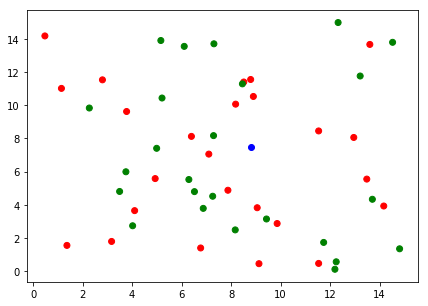

In [26]:
import matplotlib

color= ['red' if y == 1 else 'green' for y in Y]

plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], color=color)
plt.scatter(x_i[:,0], x_i[:,1], color='blue')
#plt.scatter(X[nearest][0], X[nearest][1], color='black')

plt.show()

<hr>
## k-Vecinos Cercanos (k-NN)

Una aproximación más sofisticada, clasificación k-NN, encuentra un grupo de $k$ objetos en el conjunto de entrenamiento que se encuentran más cerca del objeto de prueba, y asigna una clase al mismo basado en la predominancia de una clase particular en el vecindario.
<img src="res/knn/knn.png" width="400">
Dados un conjunto de entrenamiento $(X,Y)$ y un objeto de prueba $x_i$, el algoritmo computa la distancia o similaridad entre $x_i$ y todos los objetos de entrenamiento que pertenecen a $(X,Y)$ para determinar la lista de vecinos más cercanos.  Una vez se obtiene dicha lista, $x_i$ se clasifica con la clase de mayor aparición en su vecindario (mayoría de votos). 
<img src="res/knn/knn_example.png" width="700">

In [18]:
def k_nearest_neighbor(x_i, X, k):
    """
    Implements a k-NN classifier using euclidean distance.

    Arguments:
    x_i -- array i
    X -- two-dimensional array containing training samples features
    k -- number of neighbors

    Returns:
    array of indexes of nearest neighbors
    """
    distances = vect_euclidean_dist(x_i, X)
    ordered_index = np.argsort(distances)
    nearest_index = ordered_index[0:k]
    return nearest_index

In [19]:
from collections import Counter

print("nearest neighbors: ", X[nearest])

nearest = k_nearest_neighbor(x_i, X, 11)
print("neighbors classes: ", Y[nearest])

counter = Counter(np.squeeze(Y[nearest]))
print("class: ", counter.most_common(1)[0][0])

('nearest neighbors: ', array([8.6922491 , 9.16660684]))
('neighbors classes: ', array([[0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.]]))
('class: ', 0.0)


<hr>
Una implementación real de kNN requiere crear un árbol kd-Tree para que sea posible encontrar los vecinos cercanos en un tiempo razonable computacionalmente, de tal forma que no sea necesario comparar cada nuevo dato respecto a todo el dataset. Para una lectura al respecto ir a: https://ashokharnal.wordpress.com/2015/01/20/a-working-example-of-k-d-tree-formation-and-k-nearest-neighbor-algorithms/ 

<hr>
# SKLEARN

Esta librería tiene implementadas múltiples técnicas de aprendizaje de máquina y de manejo de datasets. Realicemos una prueba simple.

In [27]:
'''
    Utility functions
'''

import numpy as np
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt

def generate_data(data_type):
    """
    Generate a binary dataset with distribution data_type

    Arguments:
    data_type -- distribution of dataset {moons,circles,blobs}

    Returns:
    X -- features
    Y -- labels
    """ 
    np.random.seed(0)
    if data_type == 'moons':
        X, Y = datasets.make_moons(200, noise=0.20)
    elif data_type == 'circles':
        X, Y = sklearn.datasets.make_circles(200, noise=0.20)
    elif data_type == 'blobs':
        X, Y = sklearn.datasets.make_blobs(centers=2, random_state=0)
    return X, Y

def visualize(X, y, model):
    plot_decision_boundary(lambda x:model.predict(x), X, y)

def plot_decision_boundary(pred_func, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.figure(figsize=(7,5))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()

In [38]:
X, Y = generate_data('blobs')

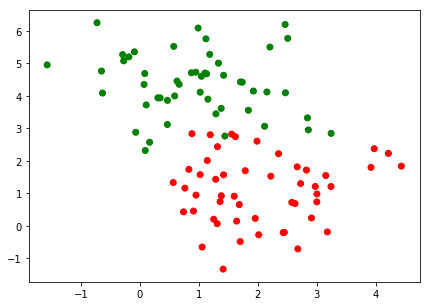

In [39]:
color= ['red' if y == 1 else 'green' for y in Y]

plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], color=color)

plt.show()

<hr>
### Implementemos kNN con SKLearn

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from time import time

tic = time()
neigh = KNeighborsClassifier(n_neighbors=55, metric='euclidean')
neigh.fit(X, Y)
toc = time()
print("Elapsed time: ", toc-tic)

('Elapsed time: ', 0.001230001449584961)


In [50]:
prediccion = neigh.predict([[-0.5, 1]])
print(prediccion)

[1]


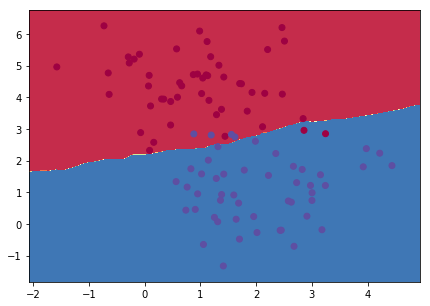

In [58]:
visualize(X, Y, neigh)

<hr>
# Trabajemos
<ul>
<li>¿Como se comporta kNN ante distintos valores de k?</li>
<li>¿Como se comporta kNN ante datasets de diferentes distribuciones?</li>
<li>¿Que pasa cuando utilizamos una porción de los datos para entrenar (X_train, Y_train) y otra para validar (X_dev, Y_dev)?</li>
</ul>

In [59]:
from sklearn.datasets import load_iris

In [60]:
dataset = load_iris()
X, Y = dataset.data, dataset.target

In [64]:
print(X.shape)
print(Y.shape)

(150, 4)
(150,)


In [61]:
from tabulate import tabulate

In [71]:
XY = np.zeros([X.shape[0], X.shape[1]+1])
XY[:,0:4] = X
XY[:,4] = Y

In [72]:
headers = list(dataset.feature_names)+['Target']
print(tabulate(XY, headers=headers))

  sepal length (cm)    sepal width (cm)    petal length (cm)    petal width (cm)    Target
-------------------  ------------------  -------------------  ------------------  --------
                5.1                 3.5                  1.4                 0.2         0
                4.9                 3                    1.4                 0.2         0
                4.7                 3.2                  1.3                 0.2         0
                4.6                 3.1                  1.5                 0.2         0
                5                   3.6                  1.4                 0.2         0
                5.4                 3.9                  1.7                 0.4         0
                4.6                 3.4                  1.4                 0.3         0
                5                   3.4                  1.5                 0.2         0
                4.4                 2.9                  1.4                 0.2         0

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
mi_clasificador = KNeighborsClassifier(n_neighbors=7, metric='euclidean')

In [75]:
mi_clasificador.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [78]:
pred = mi_clasificador.predict([[0.4, 2.8, 7.6,2.1]])
print(pred)

[2]
